<a href="https://colab.research.google.com/github/jorgeprs/Numpy_p1/blob/main/Tema_2_AnalisisEstadistico/notebook/exercises/Practica_Scrap_EDAWoAns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_2_AnalisisEstadistico/notebook/exercises/Practica_Scrap_EDAWoAns.ipynb)

<h1><center>Práctica de Módulo 2</center><h1>

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [2]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [3]:
url="https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [4]:
response = requests.get(url)

In [11]:
# Analizar sintácticamente el archivo HTML de BeautifulSoup del texto fuente
soup = BeautifulSoup(response.text, 'html.parser')

In [9]:
response

<Response [200]>

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraigamos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [26]:
main_box=soup.find_all( "div",class_="_3pLy-c row")

In [28]:
len(main_box)

24

In [44]:
box=main_box[0]

In [45]:
box

<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 15ITL6 Thin and Lig...</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTCOMG36BSUKGYMGKDSRV2LQ_COMG36BSUKGYMGKD_"><div class="_3LWZlK">3.9</div></span><span class="_2_R_DZ"><span><span>9 Ratings </span><span class="_13vcmD">&amp;</span><span> 2 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 10 Operating System</li><li class="rgWa7D">256 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">Microsoft Office Home and Student 2019</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹54,990</div><div class="_3I9_wc _27UcV

In [46]:
title = box.find('div',class_="_4rR01T")
rating = box.find("div", class_="_3LWZlK")
price = box.find("text", class_="_30jeq3")

In [47]:
print(title,price,rating)

<div class="_4rR01T">Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 15ITL6 Thin and Lig...</div> None <div class="_3LWZlK">3.9</div>


In [ ]:
#@title Texto de título predeterminado
data_list=[]
for box in main_box:
    title = box.find('div',class_="_4rR01T")
    rating = box.find("div", class_="_3LWZlK")
    price = box.find("div", class_="_30jeq3")
    temp_dict=[title,rating, price]
    data_list.append(temp_dict)

data_list
  

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [ ]:
#completa

In [ ]:
#completa

title rating     price
0   Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...      4    23,990
1   Apple MacBook Pro Core i5 8th Gen - (8 GB/512 ...    4.4  1,21,500
2   Dell Inspiron 3505 Ryzen 3 Dual Core 3250U - (...    4.3    34,790
3   HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...    4.3    47,990
4   Asus Core i3 10th Gen - (8 GB/1 TB HDD/Windows...    4.5    34,990
5   Asus VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...      4    42,990
6   HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...    4.5    34,990
7   HP 15s Ryzen 3 Dual Core 3250U - (4 GB/1 TB HD...    4.3    30,990
8   Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U - ...    4.2    42,990
9   Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...    4.5    59,990
10  Lenovo Ideapad S145 Core i3 10th Gen - (4 GB/2...    4.3    32,990
11  Lenovo Ideapad S145 APU Dual Core A6 A6-9225 -...      4    24,990
12  HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...      4    23,990
13  Mi Notebook 14 Core i5 10th Gen - (8 GB/512 GB...    4.3    44,999
14  Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...    4.1    43,990
15  Dell Inspiron 3501 Core i5 11th Gen - (8 GB/1 ...    4.7    62,690
16  Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...      4    25,990
17  HP 15 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD...    4.1    31,490
18  HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...    4.2    36,990
19  LifeDigital Zed Core i3 5th Gen - (4 GB/1 TB H...    3.7    26,990
20  Lenovo Ideapad 3 Core i3 10th Gen - (4 GB/1 TB...    3.8    33,490
21  Lenovo Legion Y540 Core i5 9th Gen - (8 GB/1 T...    4.5    63,990
22  Asus Celeron Dual Core - (4 GB/1 TB HDD/Window...    3.9    21,990
23  Dell Inspiron Core i5 10th Gen - (8 GB/512 GB ...    4.3    61,990

In [ ]:
#completa("datos_compus.csv", index=False, encoding='utf-8')

### Paso 5: Un poco de EDA y visualización de este archivo

In [ ]:
#completa

In [ ]:
#completa = #completa.read_csv("C:/Users/beyon/Documents/GitHub/02 Analisis Estadistico/notebook/exercises/datos_compus.csv", sep=None, thousands=',', engine='python')

In [ ]:
#completa

title  rating   price
0   Acer One 14 Pentium Gold - (4 GB/1 TB HDD/Wind...     4.0   23990
1   Apple MacBook Pro Core i5 8th Gen - (8 GB/512 ...     4.4  121500
2   Dell Inspiron 3505 Ryzen 3 Dual Core 3250U - (...     4.3   34790
3   HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Wind...     4.3   47990
4   Asus Core i3 10th Gen - (8 GB/1 TB HDD/Windows...     4.5   34990
5   Asus VivoBook 15 Core i5 10th Gen - (8 GB/1 TB...     4.0   42990
6   HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...     4.5   34990
7   HP 15s Ryzen 3 Dual Core 3250U - (4 GB/1 TB HD...     4.3   30990
8   Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U - ...     4.2   42990
9   Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600...     4.5   59990
10  Lenovo Ideapad S145 Core i3 10th Gen - (4 GB/2...     4.3   32990
11  Lenovo Ideapad S145 APU Dual Core A6 A6-9225 -...     4.0   24990
12  HP 15s Celeron Dual Core - (4 GB/1 TB HDD/Wind...     4.0   23990
13  Mi Notebook 14 Core i5 10th Gen - (8 GB/512 GB...     4.3   44999
14  Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...     4.1   43990
15  Dell Inspiron 3501 Core i5 11th Gen - (8 GB/1 ...     4.7   62690
16  Lenovo Ideapad 3 Athlon Dual Core 3050U - (4 G...     4.0   25990
17  HP 15 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD...     4.1   31490
18  HP 14s Core i3 10th Gen - (8 GB/256 GB SSD/Win...     4.2   36990
19  LifeDigital Zed Core i3 5th Gen - (4 GB/1 TB H...     3.7   26990
20  Lenovo Ideapad 3 Core i3 10th Gen - (4 GB/1 TB...     3.8   33490
21  Lenovo Legion Y540 Core i5 9th Gen - (8 GB/1 T...     4.5   63990
22  Asus Celeron Dual Core - (4 GB/1 TB HDD/Window...     3.9   21990
23  Dell Inspiron Core i5 10th Gen - (8 GB/512 GB ...     4.3   61990

In [ ]:
#completa

(24, 3)

In [ ]:
#completa

title      object
rating    float64
price       int64
dtype: object

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [ ]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


rating   price                                        model  \
0     4.0   23990                    Acer One 14 Pentium Gold    
1     4.4  121500           Apple MacBook Pro Core i5 8th Gen    
2     4.3   34790  Dell Inspiron 3505 Ryzen 3 Dual Core 3250U    
3     4.3   47990                      HP 14 Core i5 10th Gen    
4     4.5   34990                       Asus Core i3 10th Gen    

                                                spec  
0   (4 GB/1 TB HDD/Windows 10 Home) Z2-485 Thin a...  
1            (8 GB/512 GB SSD/Mac OS Mojave) MV9A2HN  
2   (8 GB/256 GB SSD/Windows 10 Home) Inspiron 35...  
3   (8 GB/512 GB SSD/Windows 10 Home) 14-ck2018TU...  
4   (8 GB/1 TB HDD/Windows 10 Home) X515JA-EJ321T...

Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [ ]:
#completa

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


rating   price                                        model RAM  \
0     4.0   23990                    Acer One 14 Pentium Gold        
1     4.4  121500           Apple MacBook Pro Core i5 8th Gen        
2     4.3   34790  Dell Inspiron 3505 Ryzen 3 Dual Core 3250U        
3     4.3   47990                      HP 14 Core i5 10th Gen        
4     4.5   34990                       Asus Core i3 10th Gen        

                                                 HDD  
0  4 GB/1 TB HDD/Windows 10 Home) Z2-485 Thin and...  
1             8 GB/512 GB SSD/Mac OS Mojave) MV9A2HN  
2  8 GB/256 GB SSD/Windows 10 Home) Inspiron 3505...  
3  8 GB/512 GB SSD/Windows 10 Home) 14-ck2018TU T...  
4  8 GB/1 TB HDD/Windows 10 Home) X515JA-EJ321T T...

In [ ]:
#completa

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


rating   price                                        model   RAM  \
0     4.0   23990                    Acer One 14 Pentium Gold   4 GB   
1     4.4  121500           Apple MacBook Pro Core i5 8th Gen   8 GB   
2     4.3   34790  Dell Inspiron 3505 Ryzen 3 Dual Core 3250U   8 GB   
3     4.3   47990                      HP 14 Core i5 10th Gen   8 GB   
4     4.5   34990                       Asus Core i3 10th Gen   8 GB   

                                           Hard disk  
0  1 TB HDD/Windows 10 Home) Z2-485 Thin and Ligh...  
1                  512 GB SSD/Mac OS Mojave) MV9A2HN  
2   256 GB SSD/Windows 10 Home) Inspiron 3505 Laptop  
3  512 GB SSD/Windows 10 Home) 14-ck2018TU Thin a...  
4  1 TB HDD/Windows 10 Home) X515JA-EJ321T Thin a...

Continuemos hasta conseguir lo siguiente...

In [ ]:
#completa

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


rating   price                                        model   RAM  \
0     4.0   23990                    Acer One 14 Pentium Gold   4 GB   
1     4.4  121500           Apple MacBook Pro Core i5 8th Gen   8 GB   
2     4.3   34790  Dell Inspiron 3505 Ryzen 3 Dual Core 3250U   8 GB   
3     4.3   47990                      HP 14 Core i5 10th Gen   8 GB   
4     4.5   34990                       Asus Core i3 10th Gen   8 GB   

      Storage                                                 OS  
0    1 TB HDD      Windows 10 Home) Z2-485 Thin and Light Laptop  
1  512 GB SSD                             Mac OS Mojave) MV9A2HN  
2  256 GB SSD              Windows 10 Home) Inspiron 3505 Laptop  
3  512 GB SSD  Windows 10 Home) 14-ck2018TU Thin and Light La...  
4    1 TB HDD  Windows 10 Home) X515JA-EJ321T Thin and Light ...

In [ ]:
#completa

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


rating   price                                        model   RAM  \
0     4.0   23990                    Acer One 14 Pentium Gold   4 GB   
1     4.4  121500           Apple MacBook Pro Core i5 8th Gen   8 GB   
2     4.3   34790  Dell Inspiron 3505 Ryzen 3 Dual Core 3250U   8 GB   
3     4.3   47990                      HP 14 Core i5 10th Gen   8 GB   
4     4.5   34990                       Asus Core i3 10th Gen   8 GB   

      Storage           System                            Other_Info  
0    1 TB HDD  Windows 10 Home          Z2-485 Thin and Light Laptop  
1  512 GB SSD    Mac OS Mojave                               MV9A2HN  
2  256 GB SSD  Windows 10 Home                  Inspiron 3505 Laptop  
3  512 GB SSD  Windows 10 Home     14-ck2018TU Thin and Light Laptop  
4    1 TB HDD  Windows 10 Home   X515JA-EJ321T Thin and Light Laptop

### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [ ]:
#completa

rating  price  model    RAM  Storage  System  Other_Info
0    False  False  False  False    False   False       False
1    False  False  False  False    False   False       False
2    False  False  False  False    False   False       False
3    False  False  False  False    False   False       False
4    False  False  False  False    False   False       False
5    False  False  False  False    False   False       False
6    False  False  False  False    False   False       False
7    False  False  False  False    False   False       False
8    False  False  False  False    False   False       False
9    False  False  False  False    False   False        True
10   False  False  False  False    False   False       False
11   False  False  False  False    False   False       False
12   False  False  False  False    False   False       False
13   False  False  False  False    False   False       False
14   False  False  False  False    False   False       False
15   False  False  False  False    False   False       False
16   False  False  False  False    False   False       False
17   False  False  False  False    False   False       False
18   False  False  False  False    False   False       False
19   False  False  False  False    False   False       False
20   False  False  False  False    False   False       False
21   False  False  False  False    False   False        True
22   False  False  False  False    False   False       False
23   False  False  False  False    False   False       False

### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [ ]:
#completa

rating        0
price         0
model         0
RAM           0
Storage       0
System        0
Other_Info    2
dtype: int64

In [ ]:
#completa

23

In [ ]:
#completa

HP 15s Ryzen 3 Dual Core 3250U                      2
Asus VivoBook 15 Core i5 10th Gen                   1
Lenovo Ideapad 3 Athlon Dual Core 3050U             1
HP 15s Celeron Dual Core                            1
Mi Notebook 14 Core i5 10th Gen                     1
Lenovo Legion Y540 Core i5 9th Gen                  1
HP 14 Core i5 10th Gen                              1
HP 14s Core i3 10th Gen                             1
Lenovo Ideapad 3 Core i5 10th Gen                   1
Dell Inspiron 3501 Core i5 11th Gen                 1
Lenovo Ideapad S145 APU Dual Core A6 A6             1
Lenovo Ideapad 3 Core i3 10th Gen                   1
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600H     1
HP 15 Ryzen 3 Dual Core 3200U                       1
Asus Core i3 10th Gen                               1
Acer One 14 Pentium Gold                            1
Dell Inspiron 3505 Ryzen 3 Dual Core 3250U          1
LifeDigital Zed Core i3 5th Gen                     1
Dell Inspiron Core i5 10th G

In [ ]:
#completa

rating          price
count  24.000000      24.000000
mean    4.204167   42157.458333
std     0.249311   21250.116282
min     3.700000   21990.000000
25%     4.000000   29990.000000
50%     4.250000   34990.000000
75%     4.325000   45746.750000
max     4.700000  121500.000000

In [ ]:
#completa

rating        float64
price           int64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [ ]:
#completa

rating  price                                     model   RAM   Storage  \
0      4.0  23990                 Acer One 14 Pentium Gold   4 GB  1 TB HDD   
5      4.0  42990        Asus VivoBook 15 Core i5 10th Gen   8 GB  1 TB HDD   
11     4.0  24990   Lenovo Ideapad S145 APU Dual Core A6 A6  4 GB  1 TB HDD   
12     4.0  23990                 HP 15s Celeron Dual Core   4 GB  1 TB HDD   
16     4.0  25990  Lenovo Ideapad 3 Athlon Dual Core 3050U   4 GB  1 TB HDD   
19     3.7  26990          LifeDigital Zed Core i3 5th Gen   4 GB  1 TB HDD   
20     3.8  33490        Lenovo Ideapad 3 Core i3 10th Gen   4 GB  1 TB HDD   
22     3.9  21990                   Asus Celeron Dual Core   4 GB  1 TB HDD   

                        System                              Other_Info  
0              Windows 10 Home            Z2-485 Thin and Light Laptop  
5              Windows 10 Home   X515JA-EJ501T Thin and Light Lapto...  
11             Windows 10 Home              S145-15AST Thin and Lig...  
12             Windows 10 Home      15s-du1044tu Thin and Light Laptop  
16             Windows 10 Home                          15ADA05 Laptop  
19  256 GB SSD/Windows 10 Home            Zed AIR CX3 Thin and Ligh...  
20             Windows 10 Home            81weideapad 3 15iil05 Laptop  
22             Windows 10 Home                   X543MA-GQ1015T Laptop

In [ ]:
#completa

rating  price                            model   RAM   Storage  \
4     4.5  34990           Asus Core i3 10th Gen   8 GB  1 TB HDD   
6     4.5  34990  HP 15s Ryzen 3 Dual Core 3250U   8 GB  1 TB HDD   

            System                            Other_Info  
4  Windows 10 Home   X515JA-EJ321T Thin and Light Laptop  
6  Windows 10 Home    15s-GR0011AU Thin and Light Laptop

---------

### Visualización de los datos

In [ ]:
#completa

Realizaremos una gráfica de barras de precio vs rating

Text(0.5, 1.0, 'Precio vs Calificación')

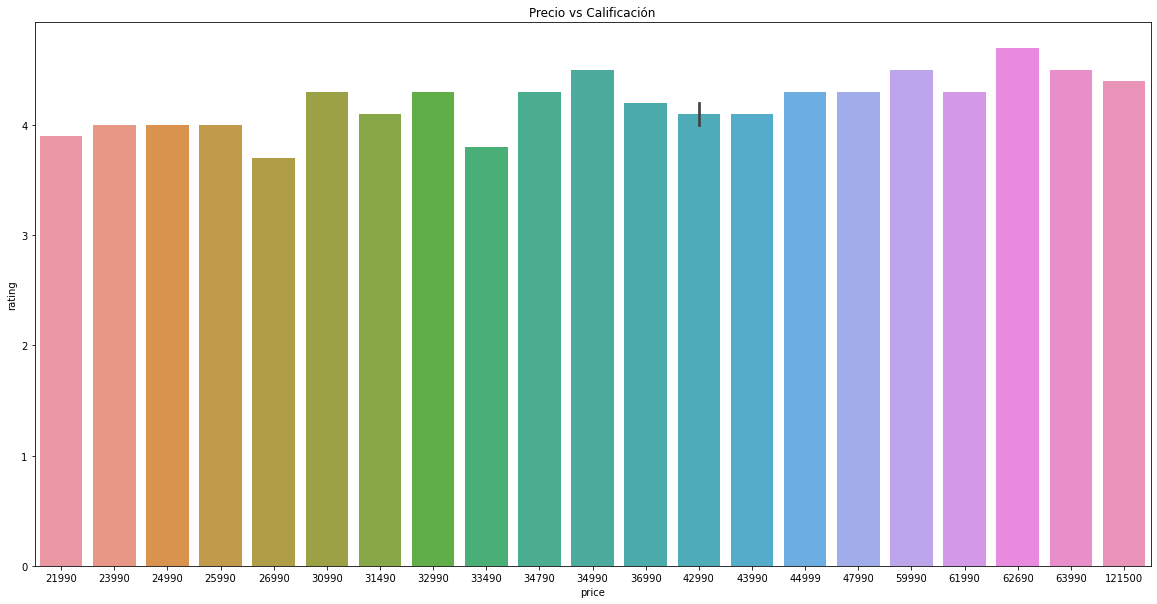

In [ ]:
#completa

Text(0.5, 1.0, 'Calificación vs Precio')

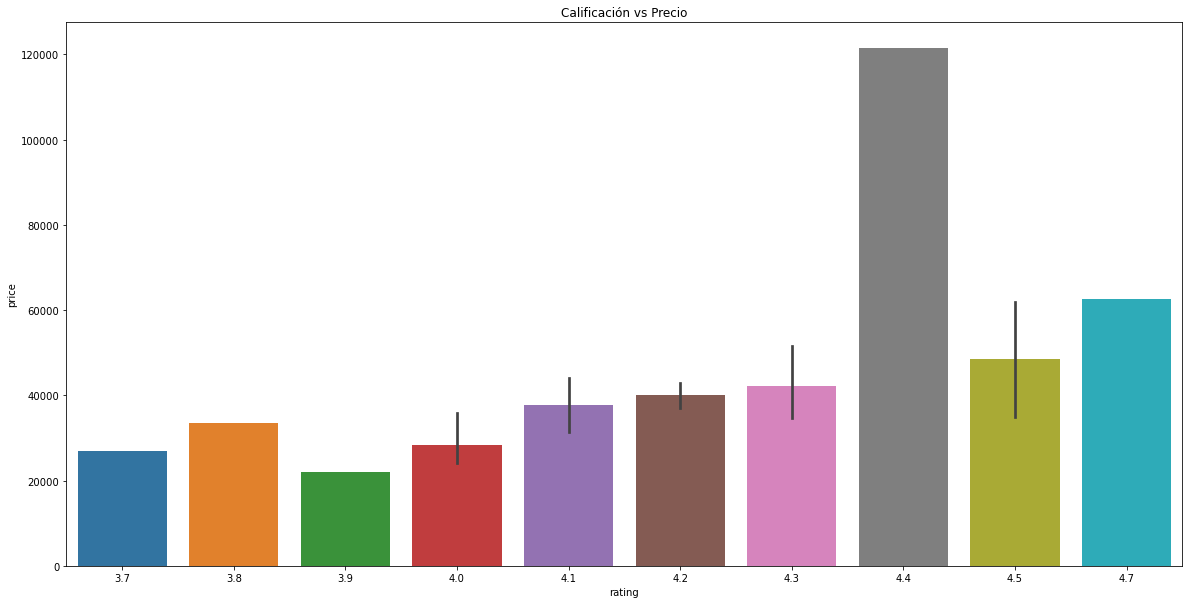

In [ ]:
#completa

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

Text(0.5, 1.0, 'Box plot')

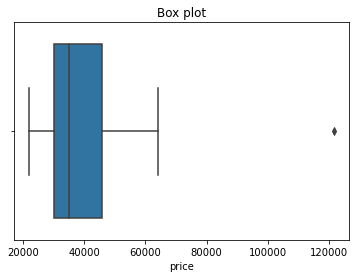

In [ ]:
#completa

## ¿Les ha salido algún discordante visual a ustedes?

In [ ]:
#completa

rating   price                                 model   RAM     Storage  \
1      4.4  121500    Apple MacBook Pro Core i5 8th Gen   8 GB  512 GB SSD   
15     4.7   62690  Dell Inspiron 3501 Core i5 11th Gen   8 GB    1 TB HDD   
21     4.5   63990   Lenovo Legion Y540 Core i5 9th Gen   8 GB    1 TB HDD   
23     4.3   61990       Dell Inspiron Core i5 10th Gen   8 GB  512 GB SSD   

                                               System  \
1                                       Mac OS Mojave   
15           256 GB SSD/Windows 10 Home/2 GB Graphics   
21  256 GB SSD/Windows 10 Home/4 GB Graphics/NVIDI...   
23                                    Windows 10 Home   

                         Other_Info  
1                           MV9A2HN  
15                       Inspiro...  
21                              NaN  
23   Ins 5408 Thin and Light Laptop

### ¿Para ustedes, cuáles fueron las computadoras más caras?

----
----
----

<h1><center>Monte Carlo</center><h1>

### ¿Por qué la casa siempre gana?

¿Cómo ganan dinero los casinos? El truco es sencillo: "Cuanto más juegas, más ganan". Echemos un vistazo a cómo funciona esto con un ejemplo simple de simulación de Monte Carlo.

----

Considere un juego imaginario en el que un jugador tiene que elegir una ficha de una bolsa de fichas.

Reglas:
 * Hay fichas que contienen números que van del 1 al 100 en una bolsa.
 * Los usuarios pueden apostar en fichas pares o impares.
 * En este juego, el 10 y el 11 son números especiales. Si apostamos a pares, entonces 10 se contará como un número impar, y si apostamos a las probabilidades, entonces 11 se contará como un número par.
 * Si apostamos a números pares y obtenemos 10, perdemos.
 * Si apostamos a números impares y obtenemos 11, perdemos.

Si apostamos por las probabilidades, la probabilidad de que ganemos es de 49/100. 

---

La probabilidad de que la casa gane es de 51/100. 

---

### Importamos librerías

In [ ]:
import random
import matplotlib.pyplot as plt

### Creación de las apuestas del jugador

In [ ]:
#Player bet
choice = input("Deseas apostar a pares o impares? \n")

#Pares
if choice == "Par":
    def pickNote():
        note = random.randint(1,100)
        #completa
            return False
        #completa
            return True

elif choice == "Odd":
    def pickNote():
        #completa

### Función principal

In [ ]:
def play(total_money, bet_money, total_plays):
    num_plays=[]
    money=[]

    play = 1
    
    for play in range(total_plays):
        if pickNote():
            total_money = total_money + bet_money
            num_plays.#completa
            money.append#completa
            
        else:
            #completa
    
    plt.ylabel("Dinero en $")
    plt.xlabel("Numero de apuestas")
    plt.plot(#completa, #completa)
    
    final_funds.append(money[-1])
    return(final_funds)

### Resultado final

In [ ]:
final_funds = []
for i in range(10):
    ending_fund = play(10000, 100, 50)
    
print(ending_fund)
print(sum(ending_fund))

print("El jugador empezó con $10,000")
print("El jugador se fue con $", str(sum(ending_fund)/len(ending_fund)))

## Ahora, para un total de apuestas de 5, 10 y 1000....

### Ahora para mil iteraciones

In [ ]:
 #completa

In [ ]:
 #completa

In [ ]:
 #completa

### ¿Qué conclusiones puedes inferir a partir del ejercicio anterior?

----

Tenga en cuenta que estos porcentajes son para nuestro juego figurativo y pueden modificarse....


-------

Al igual que con cualquier modelo de pronóstico, la simulación solo será tan buena como las estimaciones que hagamos. Es importante recordar que la simulación de Monte Carlo solo representa probabilidades y no certeza. Sin embargo, la simulación de Monte Carlo puede ser una herramienta valiosa a la hora de pronosticar un futuro desconocido.